<a href="https://colab.research.google.com/github/bwanaaa/neural-network/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#https://www.kaggle.com/code/manthansolanki/image-classification-with-mnist-dataset

In [100]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical as np_utils            # help us to transform our data later

In [101]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [102]:
print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)


In [103]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

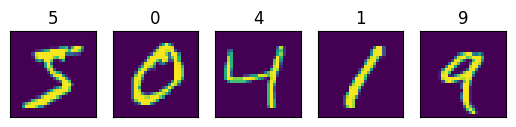

In [104]:
plot_example(X_train, y_train)

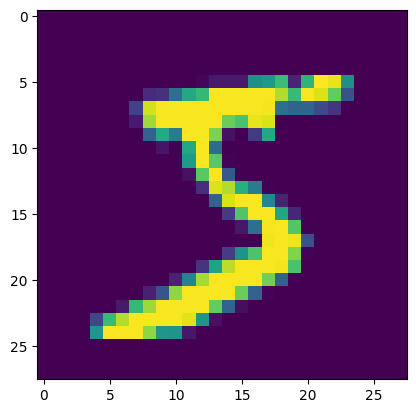

In [105]:
plt.imshow((X_train[:1].reshape(28, 28)))

In [126]:
# Reload the original labels to ensure one-hot encoding is applied only once
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Apply one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [127]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [128]:
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])
X_train.shape
y_test.shape[0]

10000

In [129]:
num_classes = y_test.shape[1]
num_pixels = 784

In [130]:
# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [131]:
# build the model
model = baseline_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
opt = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [133]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3378 - loss: 2.0689
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7744 - loss: 1.0691
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8468 - loss: 0.6496
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.5095
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8810 - loss: 0.4411


In [134]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.4409
Error: 10.47%


In [135]:
img = ((X_train[2].reshape(28, 28)))

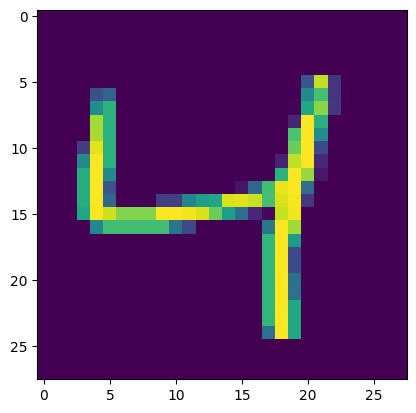

In [136]:
plt.imshow(img)

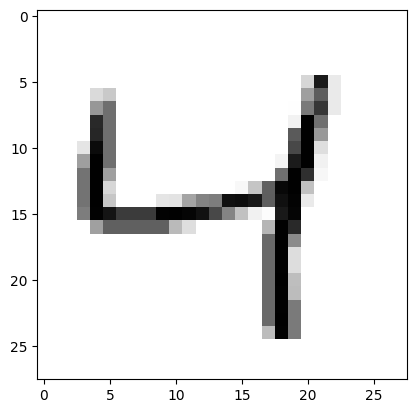

In [137]:
#now try and predict an example
img_width, img_height = 28, 28
# ii = cv2.imread(img) # Removed the imread call
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Use img directly - Removed this line
gray_image = img # Use the original grayscale image data directly
# print(gray_image)
plt.imshow(gray_image,cmap='Greys')
plt.show()
# gray_image.shape
x = np.expand_dims(gray_image, axis=0)
x = x.reshape((1, -1))

In [143]:
def test_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        #plt.subplot(151 + i)
        #plt.imshow(img)
        #plt.xticks([])
        #plt.yticks([])
        #plt.title(y)
        img_width, img_height = 28, 28
# ii = cv2.imread(img) # Removed the imread call
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Use img directly - Removed this line
        gray_image = img # Use the original grayscale image data directly
# print(gray_image)
        plt.imshow(gray_image,cmap='Greys')
        plt.show()
# gray_image.shape
        x = np.expand_dims(gray_image, axis=0)
        x = x.reshape((1, -1))


        preds_prob = model.predict(x)
        preds = np.argmax(preds_prob, axis=1)

        print('Predicted value is ',preds[0])
        #print('Probability across all numbers :', preds_prob)
        print('Probability across all numbers :')
        for i, prob in enumerate(preds_prob[0]):
            print(f'Digit {i}: {prob:.2f}')


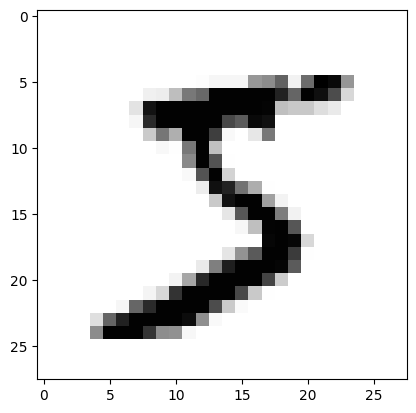

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted value is  3
Probability across all numbers :
Digit 0: 0.01
Digit 1: 0.00
Digit 2: 0.03
Digit 3: 0.51
Digit 4: 0.00
Digit 5: 0.41
Digit 6: 0.00
Digit 7: 0.01
Digit 8: 0.01
Digit 9: 0.00


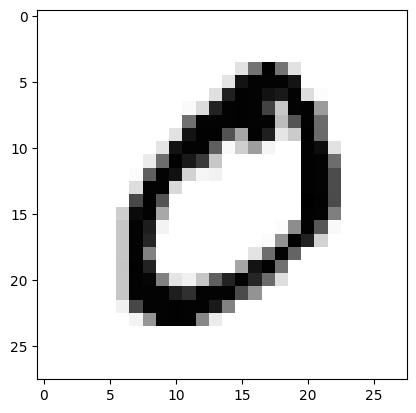

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted value is  0
Probability across all numbers :
Digit 0: 0.99
Digit 1: 0.00
Digit 2: 0.00
Digit 3: 0.00
Digit 4: 0.00
Digit 5: 0.00
Digit 6: 0.00
Digit 7: 0.00
Digit 8: 0.00
Digit 9: 0.00


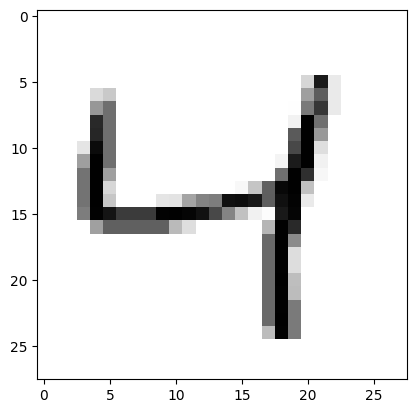

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted value is  4
Probability across all numbers :
Digit 0: 0.01
Digit 1: 0.00
Digit 2: 0.04
Digit 3: 0.11
Digit 4: 0.52
Digit 5: 0.02
Digit 6: 0.03
Digit 7: 0.03
Digit 8: 0.02
Digit 9: 0.22


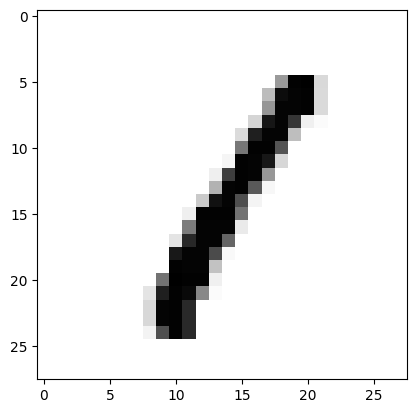

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted value is  1
Probability across all numbers :
Digit 0: 0.00
Digit 1: 0.94
Digit 2: 0.02
Digit 3: 0.01
Digit 4: 0.00
Digit 5: 0.00
Digit 6: 0.00
Digit 7: 0.00
Digit 8: 0.03
Digit 9: 0.00


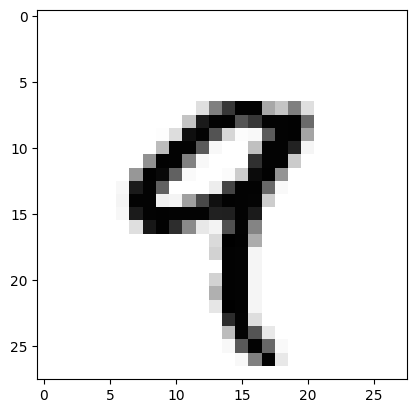

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted value is  9
Probability across all numbers :
Digit 0: 0.00
Digit 1: 0.00
Digit 2: 0.00
Digit 3: 0.00
Digit 4: 0.11
Digit 5: 0.00
Digit 6: 0.00
Digit 7: 0.02
Digit 8: 0.00
Digit 9: 0.87


In [144]:
test_example(X_train, y_train)